# Team 5 - Data Analysis for North America and parts of Latin America

In this assignment, we were tasked with conducting an analysis utilizing data from the World Bank.
- Conduct an exploratory data analysis using Python
- Develop a strategy for missing values and potential outliers
- Find and present outliers
- 9-12 minute presentation on their findings

Our countries include - Belize, Bermuda, Canada, Costa Rica, El Salvador, Guatemala, Honduras, Mexico, Nicaragua, Panama and United States.

## Import and read data
File is read into Jupyter as a whole, and a subset dataframe will be created using our 'cool name' code = hot_rod. We will use the hot_rod dataframe throughout the rest of the assignment when referencing.

In [1]:
# Importing all necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading our Excel Data Sheets

# Master Data File 
# Sheets: Raw, Raw Pivot, Assignment, Assignment Pivot
# Change index number to the 'Country Code'
file_wdiw = "WDIW.xlsx"
wdiw      = pd.read_excel(file_wdiw, index_col = 'Country Code')

# Meta Data File 
# Sheets: Series - Metadata, Country - Metadata, Country-Series - Metadata, Series-Time - Metadata, FootNote

file_wdimeta = "WDI_Metadata.xlsx"     
wdimeta      = pd.read_excel(file_wdimeta)   # Reads Sheet: Series - Metadata

# Interesting Data Sheets from Meta Data : Country - Metadata, FootNote

wdimeta_country  = pd.read_excel(file_wdimeta, "Country - Metadata")
wdimeta_footnote = pd.read_excel(file_wdimeta, "FootNote")

In [3]:
# Assignment: Data of Team Hot Rod for Exploration
region = wdiw[wdiw['Cool Name'] == 'Hot Rod']

#Check it is correct
region

,Country Name,Counter,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
Country Code,,,,,,,,,,,,,,,,,,,,,
BLZ,Belize,3,North America & Part of Latin America,Hot Rod,98.265121,98.341982,98.173431,68.487,55.085473,7.158540,...,NaN,1.9,7.5,NaN,54.399,62.906209,22970.0,25.970056,45.601,2.212754
BMU,Bermuda,3,North America & Part of Latin America,Hot Rod,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4290.0,NaN,100.000,-1.060518
CAN,Canada,3,North America & Part of Latin America,Hot Rod,100.000000,100.000000,100.000000,8.387,48.616079,25.030652,...,NaN,NaN,2.5,NaN,18.650,NaN,9984670.0,12.521239,81.350,1.247407
CRI,Costa Rica,3,North America & Part of Latin America,Hot Rod,99.600000,98.867164,99.800000,53.460,44.566920,13.373178,...,20.0,0.4,4.8,NaN,21.440,68.065397,51100.0,13.777171,78.560,2.083381
SLV,El Salvador,3,North America & Part of Latin America,Hot Rod,99.490387,100.000000,98.841156,69.459,55.159853,12.575262,...,29.2,0.6,9.0,NaN,28.725,60.665349,21040.0,17.790230,71.275,1.593742
GTM,Guatemala,3,North America & Part of Latin America,Hot Rod,93.288094,89.320689,97.149033,70.930,65.967416,7.794356,...,NaN,0.4,15.2,NaN,49.320,62.137976,108890.0,NaN,50.680,2.696399
HND,Honduras,3,North America & Part of Latin America,Hot Rod,86.500000,71.848641,97.800000,72.912,58.493475,7.228614,...,64.3,0.3,12.9,NaN,43.543,56.824489,112490.0,NaN,56.457,2.839475
MEX,Mexico,3,North America & Part of Latin America,Hot Rod,100.000000,100.000000,100.000000,60.365,51.469241,10.664602,...,NaN,0.2,3.6,NaN,20.133,60.366156,1964375.0,13.043359,79.867,1.527732
NIC,Nicaragua,3,North America & Part of Latin America,Hot Rod,86.767799,68.488026,99.843231,84.990,55.281150,7.845245,...,NaN,0.2,17.0,NaN,41.701,50.131677,130370.0,16.504696,58.299,1.634020


In [4]:
# Look at all Data Types and non-null values of our Data Set and create a specific Dataframe for our region
hot_rod = pd.DataFrame(region)
hot_rod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, BLZ to USA
Data columns (total 67 columns):
Country Name                                                                                                  11 non-null object
Counter                                                                                                       11 non-null object
Hult Region                                                                                                   11 non-null object
Cool Name                                                                                                     11 non-null object
Access to electricity (% of population)                                                                       11 non-null float64
Access to electricity, rural (% of rural population)                                                          11 non-null float64
Access to electricity, urban (% of urban population)                                                          11 non-null f

In [5]:
# Look at first 5 rows and see index
hot_rod.head()

,Country Name,Counter,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
Country Code,,,,,,,,,,,,,,,,,,,,,
BLZ,Belize,3,North America & Part of Latin America,Hot Rod,98.265121,98.341982,98.173431,68.487,55.085473,7.158540,...,NaN,1.9,7.5,NaN,54.399,62.906209,22970.0,25.970056,45.601,2.212754
BMU,Bermuda,3,North America & Part of Latin America,Hot Rod,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4290.0,NaN,100.000,-1.060518
CAN,Canada,3,North America & Part of Latin America,Hot Rod,100.000000,100.000000,100.000000,8.387,48.616079,25.030652,...,NaN,NaN,2.5,NaN,18.650,NaN,9984670.0,12.521239,81.350,1.247407
CRI,Costa Rica,3,North America & Part of Latin America,Hot Rod,99.600000,98.867164,99.800000,53.460,44.566920,13.373178,...,20.0,0.4,4.8,NaN,21.440,68.065397,51100.0,13.777171,78.560,2.083381
SLV,El Salvador,3,North America & Part of Latin America,Hot Rod,99.490387,100.000000,98.841156,69.459,55.159853,12.575262,...,29.2,0.6,9.0,NaN,28.725,60.665349,21040.0,17.790230,71.275,1.593742


In [6]:
#Check which columns are not null
hot_rod.notnull().any()

Country Name                                True
Counter                                     True
Hult Region                                 True
Cool Name                                   True
Access to electricity (% of population)     True
                                            ... 
Services, value added (% of GDP)            True
Surface area (sq. km)                       True
Tax revenue (% of GDP)                      True
Urban population (% of total population)    True
Urban population growth (annual %)          True
Length: 67, dtype: bool

## Data Cleaning - Missing Values
#### Missing values found through other sources include:
1. [CIA, World Factbook](https://www.cia.gov/library/publications/the-world-factbook/)
2. [United Nations Population Fund](https://www.unfpa.org/)
3. [Indicators - World Bank Data - World Bank Group](https://data.worldbank.org/indicator)
4. [Government of Bermuda](https://www.gov.bm/)

### Below are missing values manually inputed:

In [7]:
# Values inputed in this cell represent individual manual inputs for their resepctive columns.
# Using fillna() to determine which columns should be receiving the value found from our sources.

missing_val_0 = 32.38
hot_rod['Adolescent fertility rate (births per 1,000 women ages 15-19)'] = hot_rod['Adolescent fertility rate (births per 1,000 women ages 15-19)'].fillna(missing_val_0)

missing_val_1 = 49.3
hot_rod['Age dependency ratio (% of working-age population)'] = hot_rod['Age dependency ratio (% of working-age population)'].fillna(missing_val_1)

missing_val_2 = 22.5
hot_rod['Age dependency ratio, old (% of working-age population)'] = hot_rod['Age dependency ratio, old (% of working-age population)'].fillna(missing_val_2)

missing_val_3 = 26.8
hot_rod['Age dependency ratio, young (% of working-age population)'] = hot_rod['Age dependency ratio, old (% of working-age population)'].fillna(missing_val_3)

missing_val_4 = 10.3
hot_rod['Employment in industry (% of total employment) (modeled ILO estimate)'] = hot_rod['Employment in industry (% of total employment) (modeled ILO estimate)'].fillna(missing_val_4)

missing_val_5 = 87.65
hot_rod['Employment in services (% of total employment) (modeled ILO estimate)'] = hot_rod['Employment in services (% of total employment) (modeled ILO estimate)'].fillna(missing_val_5)

missing_val_6 = 4700000000
hot_rod['GDP (current US$)'] = hot_rod['GDP (current US$)'].fillna(missing_val_6)

missing_val_7 = 2.5
hot_rod['GDP growth (annual %)'] = hot_rod['GDP growth (annual %)'].fillna(missing_val_7)

missing_val_8 = 17.04
hot_rod['Population ages 0-14 (% of total population)'] = hot_rod['Population ages 0-14 (% of total population)'].fillna(missing_val_8)

missing_val_9 = 64.98
hot_rod['Population ages 15-64 (% of total population)'] = hot_rod['Population ages 15-64 (% of total population)'].fillna(missing_val_9)

missing_val_10 = 17.98
hot_rod['Population ages 65 and above (% of total population)'] = hot_rod['Population ages 15-64 (% of total population)'].fillna(missing_val_10)

missing_val_11 = 3.09
hot_rod['Population in the largest city (% of urban population)'] = hot_rod['Population in the largest city (% of urban population)'].fillna(missing_val_11)

missing_val_12 = 36591
hot_rod['Population, female'] = hot_rod['Population, female'].fillna(missing_val_12)

missing_val_13 = 34273
hot_rod['Population, male'] = hot_rod['Population, male'].fillna(missing_val_13)

missing_val_14 = 0
hot_rod['Rural population (% of total population)'] = hot_rod['Rural population (% of total population)'].fillna(missing_val_14)

In [8]:
#Manual fill in missing values for Canada and Mexico
#filling in missing values for Canada
hot_rod.loc[['CAN'],['Agriculture, forestry, and fishing, value added (% of GDP)']] = 1.68
hot_rod.loc[['CAN'],['Industry (including construction), value added (% of GDP)']] = 8.51
hot_rod.loc[['CAN'],['Services, value added (% of GDP)']] = 29.41

#filling in missing values Education for Mexico column
hot_rod.loc[['MEX'],['Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)']] = 0.1
hot_rod.loc[['MEX'],["Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)"]] =15.4
hot_rod.loc[['MEX'],["Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)"]] = 1.5
hot_rod.loc[['MEX'],["Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"]] = 61.17
hot_rod.loc[['MEX'],["Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)"]] = 15.84
hot_rod.loc[['MEX'],["Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)"]] =  81.42
hot_rod.loc[['MEX'],["Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)"]] = 34.11
hot_rod.loc[['MEX'],["Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)"]] = 34.11

### Below are missing values inputed using a For Loop

#### Steps to constructing For Loops:
        1. Find missing values from an online source
        2. Find corresponding column with missing values 
        3. Create a list of specific countries that are missing values from that column
        4. Create a list of all values to be inputted into the column in the same order as the country list
        5. Construct For Loop to fill in missing values

In [9]:
#Use for loops to fill missing values
#filling in missing values Birth Attended column
countries = ['BLZ', 'BMU', 'CAN', 'SLV','GTM','HND','MEX','NIC','PAN','USA']
birth_numbers = [99,89,98,99,100,63,83,98,88,95,99]
for (country_code, birth) in zip(countries, birth_numbers):
    hot_rod.loc[[country_code],['Births attended by skilled health staff (% of total)']] = birth
    
#filling in missing values Tax Revenue column
tax_countries = ['BMU','GTM', 'HND','MEX', 'PAN','USA']
tax_list = [18.7,11.9,15.6,13.04,10.6,11.95]
for (country_code, tax_num) in zip(tax_countries, tax_list): 
    hot_rod.loc[[country_code],['Tax revenue (% of GDP)']] = tax_num
    
#fill missging value for Age dependency ratio, young (% of working-age population)    
age_countries = ['BLZ', 'BMU', 'CAN', 'SLV','GTM','HND','MEX','NIC','PAN','USA']
age_nums = [47.93,26.8,23.58,31.19,42.58,58.17,51.26,40.80,47.44,42.22,28.69,39.44]
for (x,y) in zip(age_countries, age_nums):
    hot_rod.loc[[x],['Age dependency ratio, young (% of working-age population)']] = y
    
#fill missing values for doctoral education column
doctor_countries = ['BMU', 'MEX', 'USA']
doctor_nums = [1.28,0.08,1.85]
for (x,y) in zip(doctor_countries, doctor_nums):
    hot_rod.loc[[x],['Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)']] = y
    
#fill missing values for bachelor education column
bach_countries = ['BMU','CRI','SLV','HND', 'MEX', 'USA']
bach_nums = [31.11,20.63,7.12,10.5,14.71,33.44]
for (x,y) in zip(bach_countries,bach_nums):
    hot_rod.loc[[x],["Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)"]] = y

#fill missing values for Masters education column
masters_countries = ['BMU','CRI', 'MEX', 'USA']
masters_nums = [9.99,2.65,21.86, 12.61]
for (x,y) in zip(masters_countries , masters_nums):
    hot_rod.loc[[x],["Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)"]] = y
    
#fill missing values for lower secondary education column
lowsec_countries = ['CRI','SLV','HND', 'MEX', 'USA']
lowsec_nums = [53.11,43.25,33.70,59.71,95.59]
for (x,y) in zip(lowsec_countries, lowsec_nums):
    hot_rod.loc[[x],["Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"]] = y
    
#fill missing values for post secondary education column
postsec_countries = ['BMU','CRI','SLV','HND', 'MEX', 'USA']
postsec_nums = [54.74,21.45,8.49,10.79,15.15,43.51]
for (x,y) in zip(postsec_countries, postsec_nums):
    hot_rod.loc[[x],["Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)"]] = y
    
#fill missing values for short tertiary education column
ter_countries = ['CRI','SLV','HND', 'MEX', 'USA']
ter_nums = [21.45,21.45,8.49,10.79,15.15,43.51]
for (x,y) in zip(ter_countries, ter_nums):
    hot_rod.loc[[x],["Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)"]] = y
    
#fill missing values for primary  education column
pri_countries = ['CRI','SLV','HND', 'MEX', 'USA']
pri_nums = [81.24, 58.65,61.29,80.11,98.88]
for (x,y) in zip(pri_countries, pri_nums):
    hot_rod.loc[[x],["Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)"]] = y
    
#fill missing values for upper  education column
upper_countries = ['BMU','CRI','SLV','HND', 'MEX', 'USA']
upper_nums = [87.45,38.30,30.34,24.69,33.29, 89.09]
for (x,y) in zip(upper_countries, upper_nums):
    hot_rod.loc[[x],["Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)"]] = y
    
#fill missing values for population column
pop_countries = ['BLZ','BMU','CAN','CRI','SLV','GTM','HND', 'MEX','NIC','PAN', 'USA']
pop_nums = [4.62,17.98,16.84, 9.25,8.24,4.70,4.57,7.04,5.05,7.91,15.42,8.64]
for (x,y) in zip(pop_countries, pop_nums):
    hot_rod.loc[[x],["Population ages 65 and above (% of total population)"]] = y
    
#fill missing values for poverty headcount $1.90 column 
countries_190 = ['CRI','SLV','HND', 'PAN']
nums_190 = [1,1.9,17.2,2.5]
for (x,y) in zip(countries_190, nums_190):
    hot_rod.loc[[x],["Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)"]] = y
    
#fill missing values for poverty headcount $3.20 column
countries_320 = ['CRI','SLV','HND', 'PAN']
nums_320 = [2.7,8.5,31.6,6.3]
for (x,y) in zip(countries_320, nums_320):
    hot_rod.loc[[x],["Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)"]] = y
    
#fill missing values for poverty national column
countries_national = ['CRI','SLV','HND']
nums_national = [20,29.2,64.3]
for (x,y) in zip(countries_national, nums_national):
    hot_rod.loc[[x],["Poverty headcount ratio at national poverty lines (% of population)"]] = y
    
#fill missing values for HIV column
countries_HIV = ['BLZ','CRI','SLV','GTM','HND','MEX','NIC',"PAN"]
nums_HIV = [1.9,0.4,0.6,0.4,0.3,0.2,0.2,0.9]
for (x,y) in zip(countries_HIV, nums_HIV):
    hot_rod.loc[[x],["Prevalence of HIV, total (% of population ages 15-49)"]] = y
    
#fill missing values for undernourishment column
countries_undernourishment = ['BLZ','CAN','CRI','SLV','GTM','HND','MEX','NIC',"PAN",'USA']
nums_undernourishment = [7.5,2.5,4.8,9,15.2,12.9,3.6,17,10,2.5]
for (x,y) in zip(countries_undernourishment, nums_undernourishment):
    hot_rod.loc[[x],["Prevalence of undernourishment (% of population)"]] = y

### Remaining Missing Values

Although we found some missing data from third-party sources, we still didn't find  a lot of  data on education, economy and poverty. All three aspect are available at the world bank and third-party source, but they are not 2017.Data at different times would cause issues in our analysis, so we don't use past data.

After investigation, we found that the reasons for the lack of data mainly include the following points.
   1. Some indicators are derived from sporadic surveys and are only available every few years.
   2. Some indicators and datasets do not include data on high - income countries. This typically occurs because of high - income countries are not World Bank borrowers and thus are not by report figures on topics such as debt and aid.
         For example, Poverty data: The scope of poverty series focuses on developing countries (low and middle-income).
   3. It is important to note that the UNPD does not produce population estimates for countries with fewer than 50000 inhabitants. So the world bank's databases are incomplete for countries with smaller populations.
   4. Complete information had been collected in some countries, and, as a result of poor statistical information systems, may not always report them at the international level.

In order to try address this issue we looked into options of creating a regression analysis and project potential 2017 numbers. However each country lacked vital data to use this process. Our initial approach was to get the data for missing columns for the previous 5 years from 2011 - 2016. The issue we ran into was that many of these countries had 1 or 2 values for a year but none had 5 consecutive years to conduct a viable projection for year 2017. This resulted in us trying to compute the average and use it as a placeholder but the data was too skewed since years prior to 2017 were not consistent enough to get a analysis.

At this stage we made the decision to not analyze the missing columns in depth, otherwise any insights we would have determined would be speculating and will cause skews in our exploration.

We also choose not to drop any columns using dropna() because there was still valuable data for a select few countries which we planned on exploring. If we had dropped columns with missing values, we wouldn't have gotten insights on key aspect to specific countries.

## Data Analysis
Next we conduct our exploratory analysis on the new dataframe hot_rod, examining general observations and look for any key outliers in our dataset. Our analysis is broken down into 6 main categories. 5 of these categories can be referenced as a guide based on the [United Nations Sustainable Development Goals](https://sustainabledevelopment.un.org/?menu=1300)

    1. General Exploration
    2. Population (UNSDG)
    3. Military (UNSDG)
    4. Employment (UNSDG)
    5. GDP (UNSDG)
    6. Poverty/Health (UNSDG)

Utiliziing our skills with matplot.lib and seaborn, we explore our data using a variety of data visualization tools - including: boxplots, scatterplots, barcharts, heatmaps, correlation & axline

### General Exploration / Insights
Below we explored the data before conducting in depth analysis.

In [10]:
# Look at electricity levels for the region
electricity = hot_rod.iloc[:,4:7]
electricity

,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)"
Country Code,,,
BLZ,98.265121,98.341982,98.173431
BMU,100.000000,100.000000,100.000000
CAN,100.000000,100.000000,100.000000
CRI,99.600000,98.867164,99.800000
SLV,99.490387,100.000000,98.841156
GTM,93.288094,89.320689,97.149033
HND,86.500000,71.848641,97.800000
MEX,100.000000,100.000000,100.000000
NIC,86.767799,68.488026,99.843231


In [11]:
#GDP Growth
gdp_growth = print(hot_rod[['GDP growth (annual %)']])
gdp_growth

              GDP growth (annual %)
Country Code                       
BLZ                        1.437289
BMU                        2.500000
CAN                        2.978566
CRI                        3.397182
SLV                        2.307939
GTM                        2.760338
HND                        4.788027
MEX                        2.069715
NIC                        4.675475
PAN                        5.321230
USA                        2.217010


In [12]:
# distribution between males and females
gender = print(hot_rod[['Population, female','Population, male','Population, total']])

              Population, female  Population, male  Population, total
Country Code                                                         
BLZ                     188476.0          187293.0           375769.0
BMU                      36591.0           34273.0            63874.0
CAN                   18417231.0        18123037.0         36540268.0
CRI                    2474720.0         2475234.0          4949954.0
SLV                    3390313.0         2997809.0          6388122.0
GTM                    8588624.0         8326312.0         16914936.0
HND                    4719921.0         4709092.0          9429013.0
MEX                   63752822.0        61024502.0        124777324.0
NIC                    3237850.0         3147005.0          6384855.0
PAN                    2048697.0         2058074.0          4106771.0
USA                  164275323.0       160871798.0        325147121.0


In [13]:
#check if there is a positive growth in population
hot_rod['Population growth (annual %)'] > 0
#Bermuda is negative

Country Code
BLZ     True
BMU    False
CAN     True
CRI     True
SLV     True
GTM     True
HND     True
MEX     True
NIC     True
PAN     True
USA     True
Name: Population growth (annual %), dtype: bool

In [14]:
#check if there are any small countries in the data set under a million population
hot_rod['Population, total'] < 1000000

Country Code
BLZ     True
BMU     True
CAN    False
CRI    False
SLV    False
GTM    False
HND    False
MEX    False
NIC    False
PAN    False
USA    False
Name: Population, total, dtype: bool

In [15]:
# check smallest country in descending order by size
size_country = hot_rod['Surface area (sq. km)']
size_country.sort_values()
#Bermuda has a very small size

Country Code
BMU       4290.0
SLV      21040.0
BLZ      22970.0
CRI      51100.0
PAN      75420.0
GTM     108890.0
HND     112490.0
NIC     130370.0
MEX    1964375.0
USA    9831510.0
CAN    9984670.0
Name: Surface area (sq. km), dtype: float64

Based on our exploration of the dataset before diving deeper into specific outliers and categories we found important insights to our region which helped provide us a direction for more analysis.

The following sources were consulted to understand the challenges (political, economic, military and societal) faced by the countries within North and Central America previous to analyzing the dataset.

#### Some key insights are the following:

1. Inequality and poverty is high in Central America countries. 
2. All countries have high access to electricity in all regions
3. All have positive GDP growth rates
4. All have a 48 - 51% distribution of males from population
5. The Caribbean countries like Belize is vulnerable to climate change and natural disasters even with good economic development.
6. The region includes Upper, Middle and Low-Income Countries.
7. Countries like Guatemala have stable economic growth but no growth acceleration to close the gap between rich countries.
8. There are countries with high economic growth, but poverty and inequality are high, such as Honduras.  
9. Mexico has strong macroeconomic policies - 1) Privileged Geography, 2) Abundant Natural Capital, 3) Democracy allowing more political parties.
10. Nicaragua has social and political unrest
11. Panama is one of the fastest Growing economies, 7.2% between 2001 to 2013

 
Sources:

[Crime in Belize](https://www.sanpedrosun.com/crime-and-violence/2018/04/11/international-report-marks-belize-major-drug-trafficking-money-laundering-country/)<br></br>
[Panama](https://www.worldbank.org/en/country/panama)<br></br>
[Costa Rica](https://www.worldbank.org/en/country/costarica/overview)<br></br>
[El Salvador](https://www.worldbank.org/en/country/elsalvador)<br></br>
[Guatemala](https://www.worldbank.org/en/country/guatemala)<br></br>
[Honduras](https://www.worldbank.org/en/country/honduras)<br></br>
[Mexico](https://www.worldbank.org/en/country/mexico/publication/mexico-diagnostico-sistematico-de-pais)<br></br>
[Nicaragua](https://www.worldbank.org/en/country/nicaragua)

### Population Analysis
This analysis is to look into how quality of life and population can be influenced by location and demographic trends.

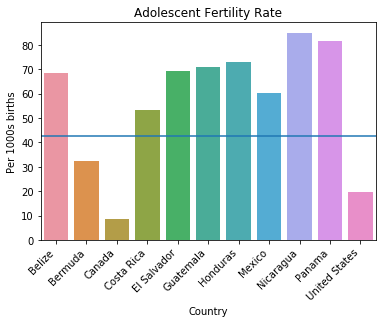

In [16]:
# Why are the fertility rates for adolescents so high for some, and not USA and Canada?
x_value = hot_rod["Adolescent fertility rate (births per 1,000 women ages 15-19)"]
country_code = hot_rod['Country Name']

chart = sns.barplot(country_code, x_value, data=hot_rod)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.axhline(y = 42.455699, label = 'World Average')
plt.title('Adolescent Fertility Rate')
plt.xlabel('Country')
plt.ylabel('Per 1000s births')
plt.savefig('Adolescent Fertility Rate.png')

C:\Users\jason\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\jason\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


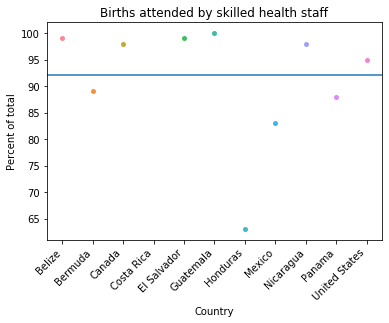

In [17]:
#Construct a Swarmplot to spot for any outliers for quality of health care
x_v = hot_rod['Country Name']
y_v = hot_rod['Births attended by skilled health staff (% of total)']
sns.swarmplot(x=x_v,y=y_v, data = hot_rod).set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Country')
plt.ylabel('Percent of total')
plt.axhline(y = 92)
plt.title('Births attended by skilled health staff')
plt.savefig('Births attended by skilled health staff.png')

#### **Insights:**

Looking at the bar chart we can see that a lot of the Latin American countries have a high adolescent fertility rate. What this measures is how adolescent girls between the ages of 15-19 are giving birth. With this data, and looking at the scatter on the left, we can gather insights that the quality of health service support for these young girls especially in Honduras(outlier) is very poor. This is a cause for concern. Similarly Mexico and Panama also have high Fertility rates, but are below the world average from skilled staff. This can be worrying news, when young girls are giving birth but do not have the quality care they deserve.

###### **Six Facts About Healthcare in Honduras**
        1. Access to healthcare for families in Honduras is determined by poverty level, socioeconomic status.
        2. One of the major barriers to receiving good healthcare in Honduras is lack of access to physicians.
        3. The Honduran health system is made up of a private and public sector. 
        4. Unfortunately, the current health system is experiencing a crisis due to poor management.
        5. Honduras implemented a different national health model in 2015 to aid impoverished and rural areas.
        6. The Millennium Challenge Corporation (MCC) has started a $15.6 million.
        
Source: [Honduras Healthcare](https://borgenproject.org/healthcare-in-honduras/)

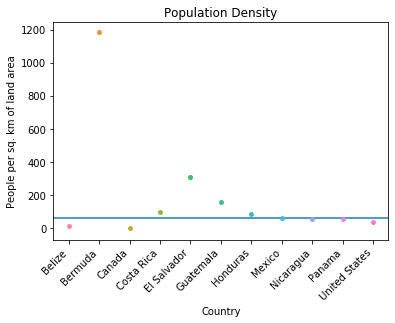

In [18]:
# Construct a swarmplot to spot any outliers in population density per sq. km
x = hot_rod['Country Name']
y = hot_rod['Population density (people per sq. km of land area)']
sns.swarmplot(x=x,y=y, data = hot_rod).set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Country')
plt.ylabel('People per sq. km of land area')
plt.axhline(y = 59)
plt.title('Population Density')
plt.savefig('Population Density.png')

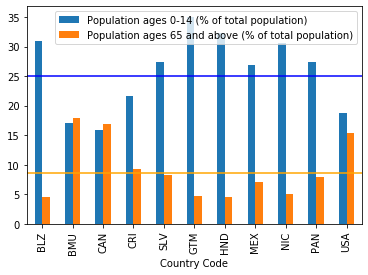

In [19]:
# Construct a bar plot to compare the demographics between young and old population, and add world average as benchmark
pop_plot = hot_rod.loc[:,
                        ['Population ages 0-14 (% of total population)',
                         'Population ages 65 and above (% of total population)']]

pop_plot.plot.bar()
plt.axhline(y = 25, color = 'blue')
plt.axhline(y = 8.7, color = 'orange')

[Text(0.5, 0, 'Population density (people per sq. km of land area)'),
 Text(1.5, 0, 'Urban population (% of total population)'),
 Text(2.5, 0, 'Life expectancy at birth, total (years)')]

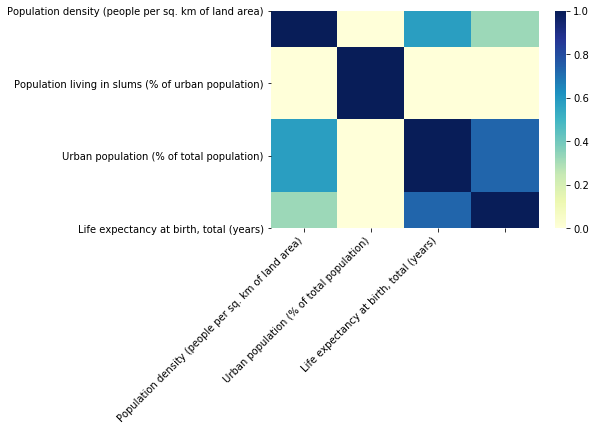

In [20]:
# Construct a correlation heatmap to analysis to see if there is a relationship between location and life expectancy
pop_growth = hot_rod.loc[:,
                        ['Population density (people per sq. km of land area)',
                         'Population living in slums (% of urban population)',
                        'Urban population (% of total population)',
                        'Life expectancy at birth, total (years)']].corr()

pop_labels = ['Population density (people per sq. km of land area)',
                        'Urban population (% of total population)',
                        'Life expectancy at birth, total (years)']

sns.heatmap(pop_growth, cmap="YlGnBu", vmin=0, vmax=1).set_xticklabels(pop_labels,rotation=45, horizontalalignment='right')

#### **Insights:**

Based on information from the CDC, we can conclude that the rural areas in majority of the countries in our region, excluding the USA and Canada have poor access to healthcare services and basic health services. 

Access to basic healthcare in Central America largely depends on socioeconomic status and environment (urban or rural). El Salvador, Guatemala, and Honduras have worked to improve access and quality of care, particularly in rural settings. Despite improvements to health services and systems, rural populations still have difficulty accessing basic health services.

We can see from this correlation, that urban population and life expectancy at birth are highly correlated at around 0.8 on the dark blue scale. This validates the assumptions the CDC provided that health care access is predominantly available to urban populations. An interesting insight is that the Bermuda has a 0% of their population living in rural areas. This is due to the fact the country is only 20.54 mi² and they don’t classify any areas in their country as rural. We see from the data cells, that from our region Bermuda is 2nd highest in terms of expectancy age. Showing that with their smaller population and access to healthcare services they are living longer. Bermuda’s health spend was 11.5 per cent as a share of its GDP, behind only Switzerland at 12.4 per cent and the US at 17.2 per cent. The OECD average was 9.08 per cent.

###### Source:

[CDC Health- Central America](https://www.cdc.gov/immigrantrefugeehealth/profiles/central-american/healthcare-diet/index.html)<br></br>
[Bermuda's Health](http://www.royalgazette.com/health/article/20190124/island-falls-behind-on-life-expectancy)

### Military
This analysis is to look into how the impact of military spending can play a big role in GDP growth.

The variables that we would like to compare:
    1. Armed forces personnel (% of total labor force) 
    2. Military expenditure (% of GDP)
    3. GDP growth (annual %) 
    
#### Imputing missing values:
    1. Bermuda has only one military unit, The Bermuda Regiment, which is supported by U.K. We would like to consider the minimum of all the countries as their Armed forces Personnel.
    2. Panama and Costa Rica have demilitarized due to distrust on military and it is also considered National Pride as a symbol of Peace. Costa Rica had internal conflicts and Panama abolished after United States invasion. Bermuda, Panama and Costa Rica do not spend on military. If they did it is very negligible (up to 0.05% of GDP). So the military expenditure is taken as zero.

In [21]:
# Exploring Military Strength of the Region
military = hot_rod.loc[:,["Country Name","Armed forces personnel (% of total labor force)",\
                             "Military expenditure (% of GDP)","GDP growth (annual %)"]].round(2)

# Imputing the Missing Values (Note: These are the missing values that we could not find)

# Bermuda Armed Forces Personnel (Supported by U.K, The Bermuda Regiment)
ber_armed = min(military["Armed forces personnel (% of total labor force)"])
military["Armed forces personnel (% of total labor force)"] = military["Armed forces personnel (% of total labor force)"].fillna(ber_armed)

# Military Expediture
mil_exp = 0  # These countries do not spend on military
military["Military expenditure (% of GDP)"] = military["Military expenditure (% of GDP)"].fillna(mil_exp)

#Check missing value
military.isnull().any()

Country Name                                       False
Armed forces personnel (% of total labor force)    False
Military expenditure (% of GDP)                    False
GDP growth (annual %)                              False
dtype: bool

In [22]:
# Get the row of World to compare the Military Strength
world = wdiw.loc[["WLD"],["Country Name","Armed forces personnel (% of total labor force)",\
                             "Military expenditure (% of GDP)","GDP growth (annual %)"]].round(2)
world

,Country Name,Armed forces personnel (% of total labor force),Military expenditure (% of GDP),GDP growth (annual %)
Country Code,,,,
WLD,World,0.8,2.16,3.17


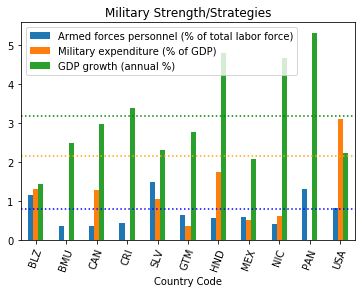

In [23]:
# Plot a bar graph with the variables and compare with the world

military.iloc[:,1:4].plot.bar()

plt.axhline(y=0.8, color='blue', linestyle='dotted')
plt.axhline(y=2.16, color='orange', linestyle='dotted')
plt.axhline(y=3.17, color='green', linestyle='dotted')
plt.xticks(rotation = 70)
plt.title("Military Strength/Strategies")

plt.savefig("Military Strength.png")
plt.show()

#### Insights:

Now, we can subset world and plot the bar graph with the variables and add horizontal axis lines that give the values of the world. The lines have the same color code.

We can observe that Military Strength of a country has great association with GDP Growth.

Through external research to help validate our analysis we can conclude military strength has a Key Relation with Economic Growth

#### External research:
   1. Military Expenditure leads to decrease in GDP Growth
   2. United States considers spending on military more that the world average, at the expense of lowering GDP.
   3. Smaller countries consider military expense unnecessary. Some distrust and also consider it a National Pride as a symbol of peace.  
   4. Smaller countries are supported by temporary military from other countries when needed.  
   5. Panama and Costa Rica demilitarized and do not have military spending after United States invasion and Internal conflicts respectively.
   6. Bermuda is supported by U.K and they only have a single military unit, The Bermuda Regiment.
   7. The Caribbean region is doing well in terms of Economic Development but they are prone to natural disasters where soldiers play a crucial role.
   8. Latin America and parts of Central America face the growing drug trafficking which lead to a lot of money laundering.
       Ex: Issues like Panama not allowing U.S military to take base and fight against drug trafficking.

Source:

[Belize military support on natural disasters](https://insidedio.blog.gov.uk/2019/09/03/tropical-alliance-responding-to-an-environmental-and-mass-casualty-disaster-in-belize/)<br></br>
[Demilitarization in Costa Rica and Panama due to distrust on military and recognized as a National Pride towards Peace](https://www.npr.org/2014/06/21/324057374/having-an-army-might-be-practical-but-its-not-obligatory)<br></br>
[Drug Trafficking in Latin America](https://latinamericanpost.com/20104-drug-trafficking--the-growing-latin-american-business)

### Employment
This analysis is to look into the spread of different employment industries and the effects of the working population on the labor force.

In [24]:
#Display Age Dependency Columns
agedep_ratio = hot_rod.loc[: ,['Age dependency ratio (% of working-age population)',
                               'Age dependency ratio, old (% of working-age population)',
                               'Age dependency ratio, young (% of working-age population)']]
print(agedep_ratio)

              Age dependency ratio (% of working-age population)  \
Country Code                                                       
BLZ                                                   55.085473    
BMU                                                   49.300000    
CAN                                                   48.616079    
CRI                                                   44.566920    
SLV                                                   55.159853    
GTM                                                   65.967416    
HND                                                   58.493475    
MEX                                                   51.469241    
NIC                                                   55.281150    
PAN                                                   54.438715    
USA                                                   52.155805    

              Age dependency ratio, old (% of working-age population)  \
Country Code                              

**Age Dependency**

Age dependency ratio is the ratio of people younger than 15 and older than 64 versus the working age population. In essence, this metric gives us an overview of the number of employed people supporting non-working people. To compute for ratio, we get the total number of dependents divided by the number of working population, multiplied by 100.

       Age dependency ratio (% of working-age population)  \
count                                          11.000000    
mean                                           53.684921    
std                                             5.626198    
min                                            44.566920    
25%                                            50.384621    
50%                                            54.438715    
75%                                            55.220502    
max                                            65.967416    

       Age dependency ratio, old (% of working-age population)  \
count                                          11.000000         
mean                                           13.622534         
std                                             6.838538         
min                                             7.158540         
25%                                             7.819800         
50%                                            12.2159

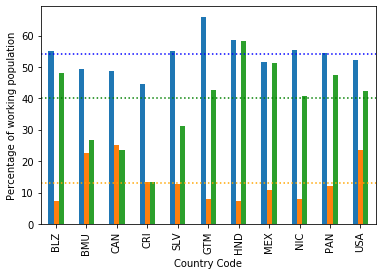

In [25]:
#Describe Columns and Check
print(agedep_ratio.describe())
agedep_ratio.plot.bar(legend=None)
plt.axhline(y=54, color='blue', linestyle='dotted')
plt.axhline(y=13, color='orange', linestyle='dotted')
plt.axhline(y=40, color='green', linestyle='dotted')
plt.ylabel('Percentage of working population')
plt.show()

[Text(0, 0, 'Age Dependency Ratio'),
 Text(0, 0, 'Age Dependency Ratio (Old)'),
 Text(0, 0, 'Age Dependency Ratio (Young)')]

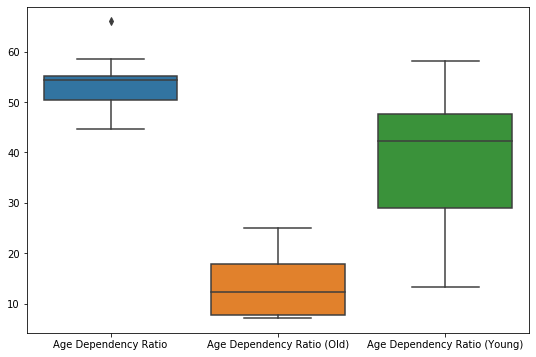

In [26]:
# Create a figure instance
age_fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
age_ax = age_fig.add_subplot(111)

# Create the boxplot
sns.boxplot(data = agedep_ratio)

#Label the axes
age_ax.set_xticklabels(['Age Dependency Ratio', 'Age Dependency Ratio (Old)', 'Age Dependency Ratio (Young)'])

#### Insights:
Generally, all countries in the region have a relatively high age dependency ratio. An outlier to take note of is Guatemala, who is seen as the highest at 66%. When we take a further look, we can see that this was mainly due to the high number of people age < 15. Another observation are Canada and US where both have a high age dependency ratio for population ages 64 and above and low age dependency ratio for ages 15 and below. This can have a negative implication in the economy in the long run.

##### Economical Implications in the long run:
 1. As the non-working population increases, those who are working are likely subject to increased taxes to compensate for larger dependent population.
 2. As the working population reaches retirement, savings increase, and in turn, decrease long-term interest rates.
 3. When there is a growing labor force, housing prices increase.
 4. However, if savings decrease, fewer funds are allocated to finance investment projects such as housing, and eventually decreases investment in physical capital.
 5. Consumption patterns also change. An increase in the elderly population influences consumption from certain goods towards healthcare services and leisure.
 6. Most importantly, if there is an increase in the elderly population, chances are fertility rates will decrease and eventually labor force, thus leading to lower economic growth.

              GDP growth (annual %)  \
Country Code                          
BLZ                        1.437289   
BMU                        2.500000   
CAN                        2.978566   
CRI                        3.397182   
SLV                        2.307939   
GTM                        2.760338   
HND                        4.788027   
MEX                        2.069715   
NIC                        4.675475   
PAN                        5.321230   
USA                        2.217010   

              Age dependency ratio (% of working-age population)  
Country Code                                                      
BLZ                                                   55.085473   
BMU                                                   49.300000   
CAN                                                   48.616079   
CRI                                                   44.566920   
SLV                                                   55.159853   
GTM                    

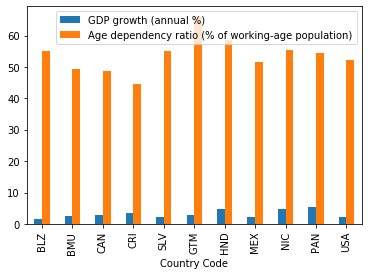

In [27]:
#Age Dependency Ratio Vs. GDP
gdp_agedep = hot_rod.loc[:,['GDP growth (annual %)','Age dependency ratio (% of working-age population)']]

print(gdp_agedep)
gdp_agedep.plot.bar()

**Employment by Sector**

In this section, we will be taking a look at three types of employment: agriculture, industry and in services. Agriculture consists of activities agriculture, forestry, hunting and fishing. The industry sector consists of activities mining, manufacturing, construction and public utilities. Lastly, the services sector consists of wholesale, retail trade, restaurants and hotels, transportation, real estate, and many more.

              Employment in agriculture (% of total employment) (modeled ILO estimate)  \
Country Code                                                                             
BLZ                                                   17.733000                          
BMU                                                         NaN                          
CAN                                                    1.518000                          
CRI                                                   12.580000                          
SLV                                                   18.575001                          
GTM                                                   29.316000                          
HND                                                   31.985001                          
MEX                                                   13.118000                          
NIC                                                   31.091000                          
PAN       

Text(0, 0.5, '% of total employment')

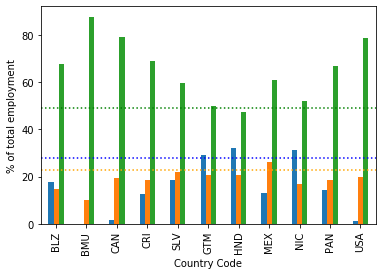

In [28]:
#Create a bar plot to compare different industrys in employment
employ_to_plot = hot_rod.loc[:,
                        ['Employment in agriculture (% of total employment) (modeled ILO estimate)',
                         'Employment in industry (% of total employment) (modeled ILO estimate)',
                         'Employment in services (% of total employment) (modeled ILO estimate)']]
print(employ_to_plot)
employ_to_plot.plot.bar(legend=None)
plt.axhline(y=28, color='blue', linestyle='dotted')
plt.axhline(y=23, color='orange', linestyle='dotted')
plt.axhline(y=49, color='green', linestyle='dotted')
plt.ylabel('% of total employment')

[Text(0, 0, 'Employment by Agriculture'),
 Text(0, 0, 'Employment by Industry'),
 Text(0, 0, 'Employment by Services')]

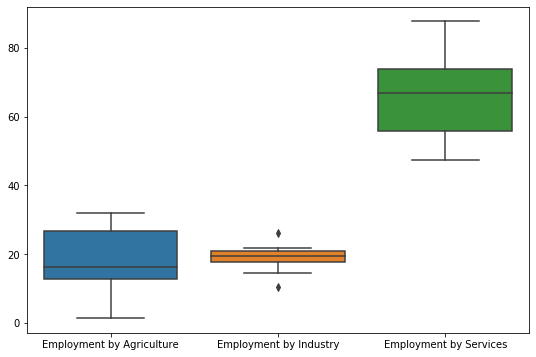

In [29]:
# Create a figure instance
employ_fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
employ_ax = employ_fig.add_subplot(111)

# Create the boxplot
sns.boxplot(data = employ_to_plot)

#Label the axes
employ_ax.set_xticklabels(['Employment by Agriculture', 'Employment by Industry', 'Employment by Services'])

#### Insights

Taking a look at the graphs, all have a relatively high employment percentage in the services sector compared to agriculture and industry. One of the outliers we can see is Mexico’s high industrial activities. In the recent years, the government has been making initiatives to reinvigorate its economy by shifting towards more complex commodities such as automobiles and airplanes. Doing so attracts domestic and foreign companies to take root. Among the lowest in agriculture are country giants US and Canada. Both have vast land yet lack to fill the labor needs. For agriculture, on the other hand, Bermuda has no data. The country is prone to severe weather (lies in the hurricane belt), thus industrial and agricultural activities are limited and rely heavily on imports instead.

#### Where does Latin America’s growth come from?
 1. Latin America’s growth is growing faster than Asia
 2. Almost 80 percent of Latin America’s GDP growth over the past 15 years has come from strong labor inputs reflecting growing populations rather than rising productivity.
 3. Falling fertility rates will undermine employment-led growth. The end of the commodity-price boom that has helped fuel the region’s growth is another concern. 
 4. In addition, there is a risk of increased protectionism that could weaken the exports component of growth. 
 5. In the perspective of the US, their growth is a huge opportunity for trade and exports.

Source:

[Mexico’s growing labor force](https://napsintl.com/mexico-manufacturing-news/the-growing-labor-force-in-mexico/)<br></br>
[McKinsey Source](https://www.mckinsey.com/~/media/mckinsey/featured%20insights/employment%20and%20growth/how%20to%20counter%20three%20threats%20to%20growth%20in%20latin%20america/mgi-discussion-paper-where-will-latin-americas-growth-come-from-april-2017.ashx)<br></br>
[NEWS Source, Forbes](https://www.forbes.com/sites/kenrapoza/2019/03/27/latin-america-economy-now-growing-faster-than-asias/#7b25140d1a76)<br></br>
[US industries and immigrants](https://www.cbsnews.com/news/illegal-immigrants-us-jobs-economy-farm-workers-taxes/)<br></br>
[Canada’s agricultural labor shortage](https://modernfarmer.com/2019/07/canada-has-a-huge-agricultural-labor-shortage/)


### GDP (Economy)
This analysis is to look into GDP growth and the influence on population, and how different the construction industry affects the overall gdp of a country.

[Text(0.5, 0, 'Population growth (annual %)'),
 Text(1.5, 0, 'Urban population growth (annual %)'),
 Text(2.5, 0, 'GDP growth (annual %)')]

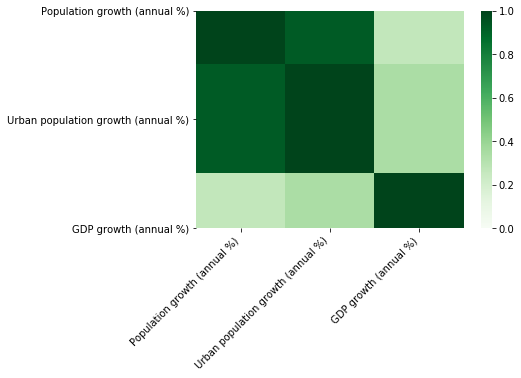

In [30]:
#Develop a correlation heatmap to understand if there is a relationship between population growth and gdp growth
growth_rate = hot_rod.loc[:,
                        ['Population growth (annual %)',
                         'Urban population growth (annual %)',
                        'GDP growth (annual %)']].corr()
growth_labels = ['Population growth (annual %)',
                         'Urban population growth (annual %)',
                        'GDP growth (annual %)']
sns.heatmap(growth_rate, cmap="Greens", vmin=0, vmax=1).set_xticklabels(growth_labels,rotation=45, horizontalalignment='right')

Labor is a factor of production, and increase in labor force is due to the increase in population, then this may lead to increase in GDP,

This is not always the case due to the following reasons:

    1. Youth, working class and old people in population differ so the population growth doesn’t correlate with GDP Growth.
    2. There could be unemployment and social conflicts.
    3. There could be natural disasters that affect the GDP.

Therefore, we are drawn to a conclusion that we need to find the major driver that has a significant influence on the GDP of countries in our region.

### Poverty
This analysis is to look into the quality of health and poverty in a few countries. Lack of data from a majority of countries resulted in us focusing only on the countries that we had data on and compared them to each other to get a basic understanding on the situation.

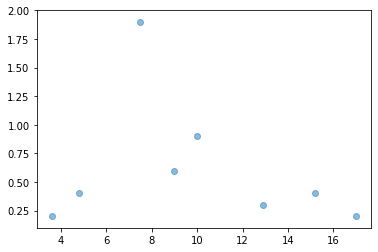

In [31]:
# Visualizing the relationship between Prevalence of undernourishment and Prevalence of HIV, total
plt.scatter(x = 'Prevalence of undernourishment (% of population)',
            y = 'Prevalence of HIV, total (% of population ages 15-49)',
            alpha = 0.5,
            cmap = 'bwr',
            data = hot_rod)

plt.savefig('HIV_undernourishment.png')
plt.show()

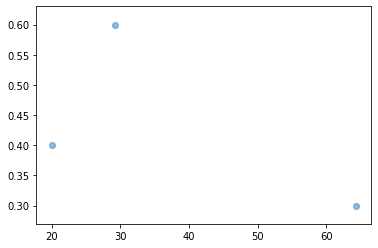

In [32]:
# Visualizing the relationship between Poverty headcount ratio at national poverty lines and Prevalence of HIV, total
plt.scatter(x = 'Poverty headcount ratio at national poverty lines (% of population)',
            y = 'Prevalence of HIV, total (% of population ages 15-49)',
            alpha = 0.5,
            cmap = 'bwr',
            data = hot_rod)

plt.savefig('HIV_headcountratio.png')
plt.show()

              Prevalence of undernourishment (% of population)  \
Country Code                                                     
BLZ                                                        7.5   
BMU                                                        NaN   
CAN                                                        2.5   
CRI                                                        4.8   
SLV                                                        9.0   
GTM                                                       15.2   
HND                                                       12.9   
MEX                                                        3.6   
NIC                                                       17.0   
PAN                                                       10.0   
USA                                                        2.5   

              Prevalence of HIV, total (% of population ages 15-49)  
Country Code                                                         
B

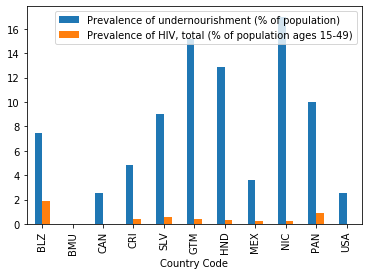

In [33]:
#Display Undernourishment vs HIV
Undernourishment_HIV = hot_rod.loc[: ,['Prevalence of undernourishment (% of population)',
                               'Prevalence of HIV, total (% of population ages 15-49)']]
print(Undernourishment_HIV)

#Graph Undernourishment vs HIV

print(Undernourishment_HIV.plot.bar())

              Prevalence of undernourishment (% of population)  \
Country Code                                                     
CRI                                                        4.8   
SLV                                                        9.0   
HND                                                       12.9   

              Poverty headcount ratio at national poverty lines (% of population)  
Country Code                                                                       
CRI                                                        20.0                    
SLV                                                        29.2                    
HND                                                        64.3                    
AxesSubplot(0.125,0.125;0.775x0.755)


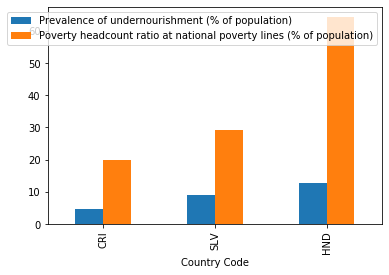

In [34]:
#Display Undernourishment vs Poverty headcount ratio at national poverty lines
Undernourishment_headcountratio = hot_rod.loc[['CRI','SLV','HND'] ,['Prevalence of undernourishment (% of population)',
                               'Poverty headcount ratio at national poverty lines (% of population)']]
print(Undernourishment_headcountratio)

#Graph Undernourishment vs Poverty headcount ratio at national poverty lines
print(Undernourishment_headcountratio.plot.bar())

plt.savefig('Undernourishment_headcountratio.png')
plt.show()

              Prevalence of undernourishment (% of population)  \
Country Code                                                     
CRI                                                        4.8   
SLV                                                        9.0   
HND                                                       12.9   

              Poverty headcount ratio at national poverty lines (% of population)  \
Country Code                                                                        
CRI                                                        20.0                     
SLV                                                        29.2                     
HND                                                        64.3                     

              Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)  \
Country Code                                                                        
CRI                                                         2.7          

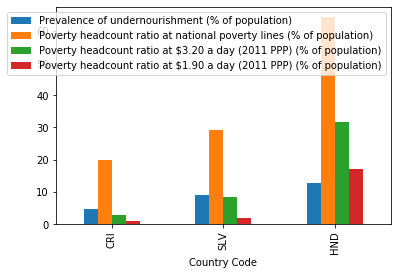

In [35]:
#Display Undernourishment vs Poverty headcount ratio at national poverty lines

Undernourishment_povertyratio = hot_rod.loc[['CRI','SLV','HND'] ,['Prevalence of undernourishment (% of population)',
                               'Poverty headcount ratio at national poverty lines (% of population)', 'Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)', 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)' ]]
print(Undernourishment_povertyratio)

#Graph to analyze relationship between Undernourishment and Poverty headcount ratio at national poverty lines

print(Undernourishment_povertyratio.plot.bar())


plt.savefig('Undernourishment_povertyratio.png')
plt.show()

              Poverty headcount ratio at national poverty lines (% of population)
Country Code                                                                     
CRI                                                        20.0                  
SLV                                                        29.2                  
HND                                                        64.3                  
AxesSubplot(0.125,0.125;0.775x0.755)


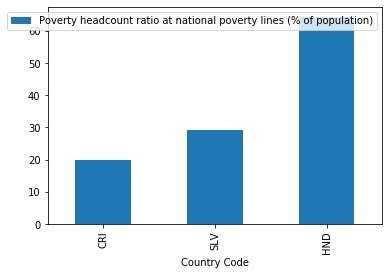

In [36]:
#Display Prevalence of HIV vs Poverty headcount ratio at national poverty lines
HIV_povertyratio = hot_rod.loc[['CRI','SLV','HND'] ,['Poverty headcount ratio at national poverty lines (% of population)']]
print(HIV_povertyratio)

#Graph to analyze relationship between HVI and Poverty headcount ratio at national poverty lines

print(HIV_povertyratio.plot.bar())


plt.savefig('HIV_povertyratio.png')
plt.show()

#### Insights:

In Costa Rica, El Salvador and Honduras we can see a percentage of the population below minimum level of dietary energy consumption (prevalence of undernourishment) shows the percentage of the population whose food intake is insufficient to meet dietary energy requirements continuously. Data is showing that these three countries the people that lives with less than 3.2 and 1.9 USD is high, meaning that food intake is insufficient to meet dietary energy requirements. Honduras occupies the first place, then El Salvador and in the third position Costa Rica. Is consistent also with the GDP % of the countries.
 
Also, we can see a positive association between HIV and undernourishment. The poorest countries reflect a high level of HIV as a % of the population.

## Key Insights
After our exploration of the World Bank dataset our main findings are below

1. Military Strength has a Key Relation with Economic Growth.
2. Lack of access to healthcare professionals can have long term effects on adolescent girls giving birth.
3. Size of a country does not affect the quality of health and life expectancy, poverty and rural areas does.
4. There is a positive association between HIV and undernourishment.
5. Age dependency implies economic effects: the older decreases growth, while the young immigrate to look for better opportunities.
6. Issues such as immigration, in the case of the US, contribute to low recorded employment in the agriculture sector
7. Latin America’s overall economic growth is beneficial for the US because of trade and exports, and the rest of the world.

~~~

 _______ _                 _                                               
 |__   __| |               | |                                              
    | |  | |__   __ _ _ __ | | __  _   _  ___  _   _                        
    | |  | '_ \ / _` | '_ \| |/ / | | | |/ _ \| | | |                       
    | |  | | | | (_| | | | |   <  | |_| | (_) | |_| |                       
    |_|  |_| |_|\__,_|_| |_|_|\_\  \__, |\___/ \__,_|                       
  _____            __               __/ |        _____ _                    
 |  __ \          / _|             |___/        / ____| |                   
 | |__) | __ ___ | |_ ___  ___ ___  ___  _ __  | |    | |__   __ _ ___  ___ 
 |  ___/ '__/ _ \|  _/ _ \/ __/ __|/ _ \| '__| | |    | '_ \ / _` / __|/ _ \
 | |   | | | (_) | ||  __/\__ \__ \ (_) | |    | |____| | | | (_| \__ \  __/
 |_|   |_|  \___/|_| \___||___/___/\___/|_|     \_____|_| |_|\__,_|___/\___|                                                                                   

~~~      

~~~

  _______                     _____ 
 |__   __|                   | ____|
    | | ___  __ _ _ __ ___   | |__  
    | |/ _ \/ _` | '_ ` _ \  |___ \ 
    | |  __/ (_| | | | | | |  ___) |
    |_|\___|\__,_|_| |_| |_| |____/ 
                                    
~~~

Jason Lee, Sharmaine Ysabel Aguilar, Arundhishaan Kanagaraja,  Abril Benhumea Flores,   & Bowen Zhang